In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import sys
sys.path.append(r"C:\Users\Bruker\OneDrive\Dokumenter\NTNU\4D_CT\Plotting")
sys.path.append(r"C:\Users\Bruker\OneDrive\Dokumenter\NTNU\4D_CT\CT")
sys.path.append(r"C:\Users\Bruker\OneDrive\Dokumenter\NTNU\4D_CT\3DTomoGAN")
from plots import *
import os
import utils
import h5py
from scipy.optimize import curve_fit
from PIL import Image

import scipy.ndimage as nd

from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.patheffects as PathEffects

# %matplotlib inline

%reload_ext autoreload
%autoreload 2

c:\Users\Bruker\anaconda3\envs\4D_CT\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
root = r"C:\Users\Bruker\Documents"
choose_formatter(False)

In [62]:
# file = np.load(os.path.join(root, "Rec_0_1_fdk_enahncement_metrics.npz"))
# file = np.load(os.path.join(root, "hourglassV3_13_55_Rec_0_5_fdk_enhancement_metrics.npz"))
file = np.load(os.path.join(root, "sandstoneV3_50_Rec_0_1_fdk_enhancement_metrics.npz"))

coords = file["coords"]
ssims = file["ssims"]
psnrs = file["psnrs"]
ossims = file["old_ssims"]
opsnrs = file["old_psnrs"]

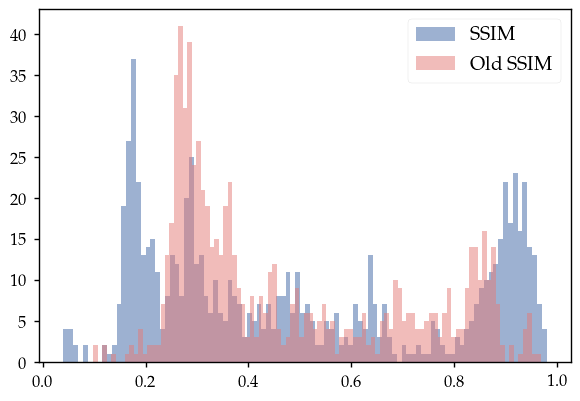

In [63]:
fig,ax = plt.subplots()

ax.hist(ssims, bins=100, label="SSIM", alpha=0.5)
ax.hist(ossims, bins=100, label="Old SSIM", alpha=0.5)
ax.legend()
plt.show()

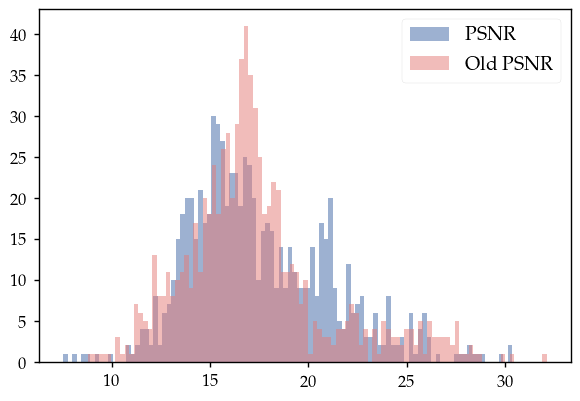

In [64]:
fig,ax = plt.subplots()

ax.hist(psnrs, bins=100, label="PSNR", alpha=0.5)
ax.hist(opsnrs, bins=100, label="Old PSNR", alpha=0.5)
ax.legend()
plt.show()

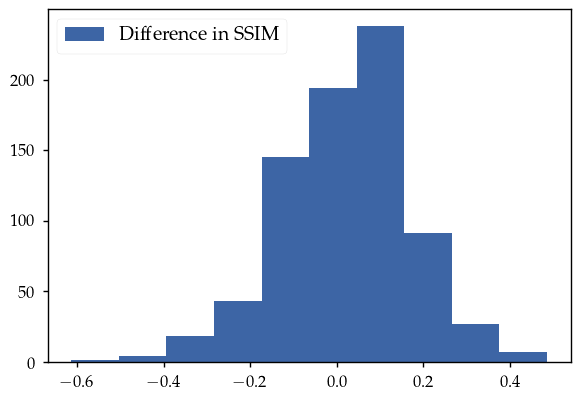

[[   0.    0.    0.]
 [   0.    0.  128.]
 [   0.    0.  256.]
 ...
 [1408.  896.  640.]
 [1408.  896.  768.]
 [1408.  896.  896.]]


In [65]:
fig, ax = plt.subplots()

ax.hist( ssims-ossims, label="Difference in SSIM")
# ax.plot(np.sum(coords**2, axis=1), psnrs, label="PSNR")
# ax.plot( ossims, label="Old SSIM")
# ax.plot(np.sum(coords**2, axis=1), opsnrs, label="Old PSNR")
ax.legend()
plt.show()

print(coords)

(27, 3)


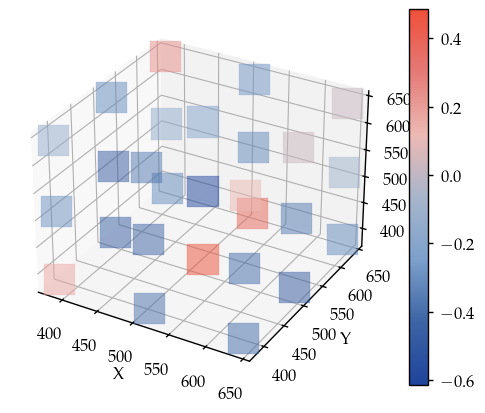

[512. 512. 384.]
0.3690994083881378
[640. 640. 640.]
0.9188821315765381
[512. 640. 640.]
0.7736884355545044


In [66]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
from matplotlib import cm

color_map = cm.ScalarMappable(cmap=XRDCT_palette_cmp)
color_map.set_array(ssims-ossims)

bool_list = [ np.all(cds >= 350) and np.all(cds <=750) for cds in coords]
ncoords = coords[bool_list ]
nssims = ssims[ bool_list]
nossims = ossims[bool_list]
print(ncoords.shape)

ax.scatter(ncoords[:, 0], ncoords[:, 1], ncoords[:, 2], marker="s", c=nssims-nossims, cmap=XRDCT_palette_cmp, s=500, alpha=0.5,)

# bool_list = np.where( ncoords[:,-1] < 500)
# lowerc = ncoords[bool_list]
# lowers = nssims[bool_list]
# lowero = nossims[bool_list]


# ax.plot_surface(lowerc[:, 0], lowerc[:, 1], 0*lowerc[:,-1][np.newaxis,:], facecolors=color_map.to_rgba(lowers-lowero), alpha=0.5,)


# bool_list = np.where( ncoords[:,-1] == 512)
# middlec = ncoords[bool_list]
# middles = nssims[bool_list]
# middleo = nossims[bool_list]

# ax.plot_surface(middlec[:, 0], middlec[:, 1], (100*lowerc[:,-1]/lowerc[:,-1])[np.newaxis,:], cmap=XRDCT_palette_cmp, alpha=0.5,)

# bool_list = np.where( ncoords[:,-1] > 513)
# higherc = ncoords[bool_list]
# highers = nssims[bool_list]
# highero = nossims[bool_list]

# ax.plot_surface(higherc[:, 0], higherc[:, 1], (200*lowerc[:,-1]/lowerc[:,-1])[np.newaxis,:], cmap=XRDCT_palette_cmp , alpha=0.5,)


ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.colorbar(color_map, ax=ax)
plt.show()

ind = np.argmax(nssims-nossims)
print(ncoords[ind])
print(nssims[ind]-nossims[ind])

ind = np.argmax(nssims)
print(ncoords[ind])
print(nssims[ind])

ind = np.argmax(nossims)
print(ncoords[ind])
print(nossims[ind])